Tis the season for match making and mining. LoveLots, a new dating app, has commissioned your group to conduct a research and uncover Valentine's Day patterns and insights that might be useful in their app’s content. 

In [102]:
import numpy as my_n
import pandas as my_p
import matplotlib.pyplot as my_pl
import seaborn as my_sb
from sklearn.preprocessing import LabelEncoder

In [103]:
my_love = my_p.read_csv("VDAY_Cleaned_and_Organized.csv")

In [104]:
my_love.shape

(384, 14)

In [105]:
my_love.head()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
0,2/6/2025 9:51:57,aidelajusta@my.cspc.edu.ph,Female,19-24,CHS,BSM,Junior,Single,0,No,Flowers,Very Romantic,Shared interests,Yes
1,2/6/2025 13:07:44,llberdul@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,Single,1,Yes,Greeting Cards,Not At All Romantic,Intelligence,No
2,2/7/2025 11:04:17,mamasiglat@my.cspc.edu.ph,Female,16-18,CHS,BSM,Freshmen,Single,1,No,Romantic Dinners/Getaways,Not At All Romantic,Intelligence,No
3,2/7/2025 17:10:13,xiparone@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,In a relationship,2,Yes,Greeting Cards,Moderately Romantic,Shared interests,Yes
4,2/7/2025 17:12:34,joclavillas@my.cspc.edu.ph,Female,19-24,CHS,BSN,Junior,Single,2,No,K-pop Merchandise,Moderately Romantic,Sensitivity,Maybe


In [106]:
my_love.tail()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
379,2/14/2025 21:20:46,jobaeno@my.cspc.edu.ph,Female,19-24,CTDE,BTVTEd,Junior,Single,2,They will never know!,To hear “I Love You”,Very Romantic,Humor/Fun,Maybe
380,2/14/2025 23:04:31,givillamayor@my.cspc.edu.ph,Male,19-24,CTDE,BTVTEd,Sophomore,Single,1,Yes,To hear “I Love You”,Moderately Romantic,Intelligence,Maybe
381,2/15/2025 10:44:47,erocayo@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Sophomore,It’s complicated,1,They will never know!,Romantic Dinners/Getaways,Very Romantic,Humor/Fun,Maybe
382,2/15/2025 10:47:03,joespedillon@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Sophomore,Single,1,Yes,Greeting Cards,Moderately Romantic,Humor/Fun,Maybe
383,2/15/2025 10:52:50,marolino@my.cspc.edu.ph,Male,19-24,CCS,BSIS,Junior,Single,0,Yes,NaN,Very Romantic,Intelligence,Yes


In [107]:
my_love.describe()

,Timestamp,Email Address,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
count,384,384,384,384,384,383,381,384,384,384,378,384,384,384
unique,384,384,2,3,6,23,4,7,12,4,71,6,40,3
top,2/14/2025 12:57:54,krpadua@my.cspc.edu.ph,Female,19-24,CCS,BSIT,Junior,Single,0,Yes,Flowers,Moderately Romantic,Sincerity,Maybe
freq,1,1,236,333,156,51,127,210,136,183,137,156,106,192


In [108]:
my_love.dtypes

Timestamp                      object
Email Address                  object
Gender                         object
Age                            object
College                        object
Degree_Program                 object
Year_Level                     object
Rel_Status                     object
Prev_Rel                       object
Men_knows                      object
Want_for_Vday                  object
How_Rom_VDay                   object
Imp_Quality                    object
Men_confess_/_Women_answer     object
dtype: object

In [109]:
my_love.isnull().sum()

Timestamp                      0
Email Address                  0
Gender                         0
Age                            0
College                        0
Degree_Program                 1
Year_Level                     3
Rel_Status                     0
Prev_Rel                       0
Men_knows                      0
Want_for_Vday                  6
How_Rom_VDay                   0
Imp_Quality                    0
Men_confess_/_Women_answer     0
dtype: int64

In [110]:
my_love = my_love.dropna()

In [111]:
my_love.drop(["Timestamp", "Email Address"],axis=1,inplace=True)
my_love.head()

,Gender,Age,College,Degree_Program,Year_Level,Rel_Status,Prev_Rel,Men_knows,Want_for_Vday,How_Rom_VDay,Imp_Quality,Men_confess_/_Women_answer
0,Female,19-24,CHS,BSM,Junior,Single,0,No,Flowers,Very Romantic,Shared interests,Yes
1,Female,19-24,CHS,BSN,Junior,Single,1,Yes,Greeting Cards,Not At All Romantic,Intelligence,No
2,Female,16-18,CHS,BSM,Freshmen,Single,1,No,Romantic Dinners/Getaways,Not At All Romantic,Intelligence,No
3,Female,19-24,CHS,BSN,Junior,In a relationship,2,Yes,Greeting Cards,Moderately Romantic,Shared interests,Yes
4,Female,19-24,CHS,BSN,Junior,Single,2,No,K-pop Merchandise,Moderately Romantic,Sensitivity,Maybe


C:\Users\Joshua Ean\AppData\Local\Temp\ipykernel_56400\3172294851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = my_sb.countplot(y='Gender', data=my_love, palette="coolwarm", edgecolor="black", linewidth=1.5)


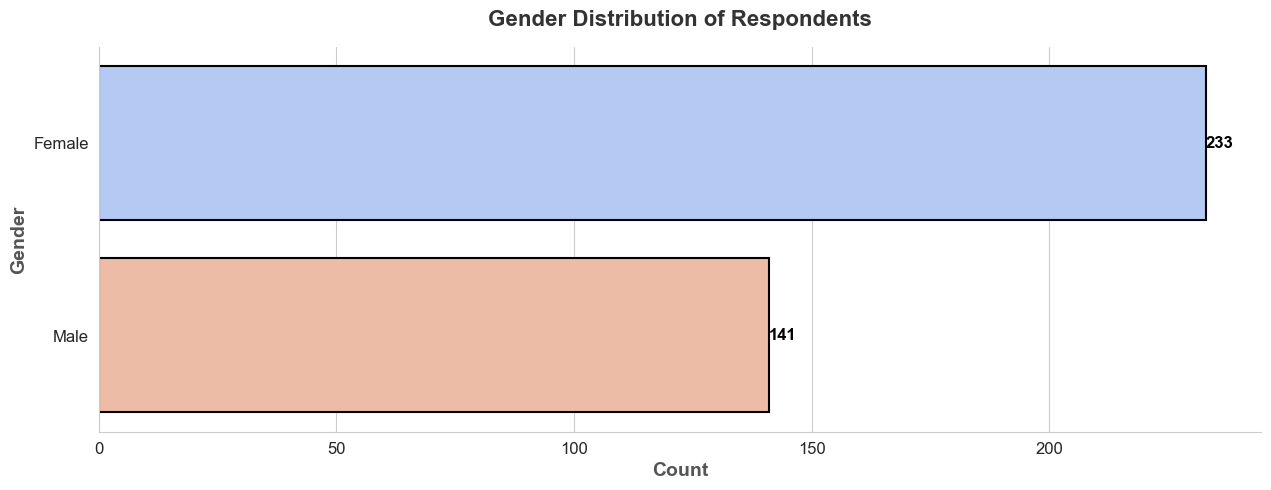

In [112]:
# Set up figure size
my_pl.figure(figsize=(15, 5))

# Create a countplot for gender distribution
ax = my_sb.countplot(y='Gender', data=my_love, palette="coolwarm", edgecolor="black", linewidth=1.5)

# Annotate bars with the exact count
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Get the exact count
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Position the text
                ha='left', va='center', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution of Respondents", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Count", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Gender", fontsize=14, fontweight="bold", color="#555")

# Rotate y-axis labels for better readability
my_pl.xticks(fontsize=12)
my_pl.yticks(fontsize=12)

# Remove top and right borders for a clean design
my_sb.despine()

# Show the plot
my_pl.show()


Above, the gender with the most respondent is Female.

In [113]:
my_love['Gender']=my_love['Gender'].str.lower()

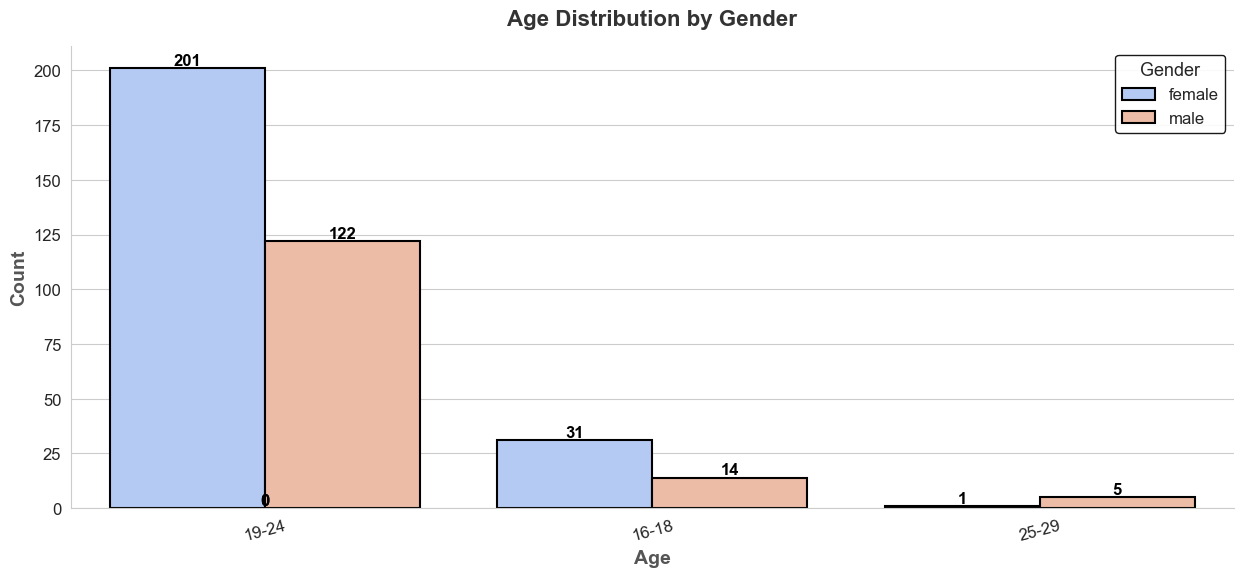

In [147]:
# Set Seaborn style for a polished look
my_sb.set_style("whitegrid")

# Set up the figure
my_pl.figure(figsize=(15, 6))

# Create a bar plot to show age distribution by gender
ax = my_sb.countplot(x="Age", hue="Gender", data=my_love, palette="coolwarm", edgecolor="black", linewidth=1.5)

# Annotate each bar with the exact count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Age Distribution by Gender", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Age", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)  # Slight transparency

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Remove top and right borders for a clean design
my_sb.despine()

# Show the plot
my_pl.show()


<Figure size 1200x800 with 0 Axes>

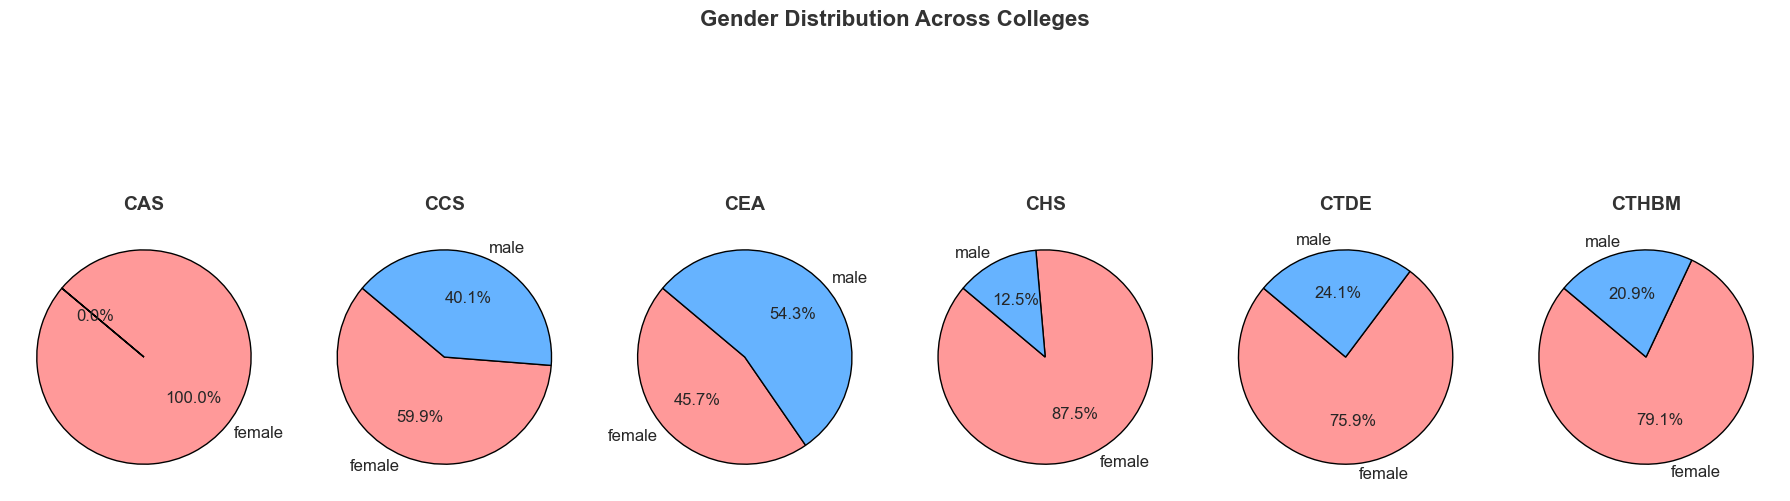

In [116]:
# Set figure size
my_pl.figure(figsize=(12, 8))

# Group dataset: Count occurrences of each gender per college
college_gender_counts = my_love.groupby("College ")["Gender"].value_counts().unstack()

# Define colors for gender categories
colors = ["#FF9999", "#66B3FF"]  

# Create subplots for each college
fig, axes = my_pl.subplots(nrows=1, ncols=len(college_gender_counts), figsize=(18, 6))

# Loop through each college and create a separate pie chart
for ax, (college, data) in zip(axes, college_gender_counts.iterrows()):
    data.plot(kind="pie", ax=ax, autopct="%1.1f%%", colors=colors, startangle=140, 
              wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
    ax.set_title(college, fontsize=14, fontweight="bold", pad=10, color="#333")
    ax.set_ylabel("")  # Remove y-labels for a clean look

# Set a central title for all charts
my_pl.suptitle("Gender Distribution Across Colleges", fontsize=16, fontweight="bold", color="#333", y=1.05)

# Adjust layout for better spacing
my_pl.tight_layout()
my_pl.show()


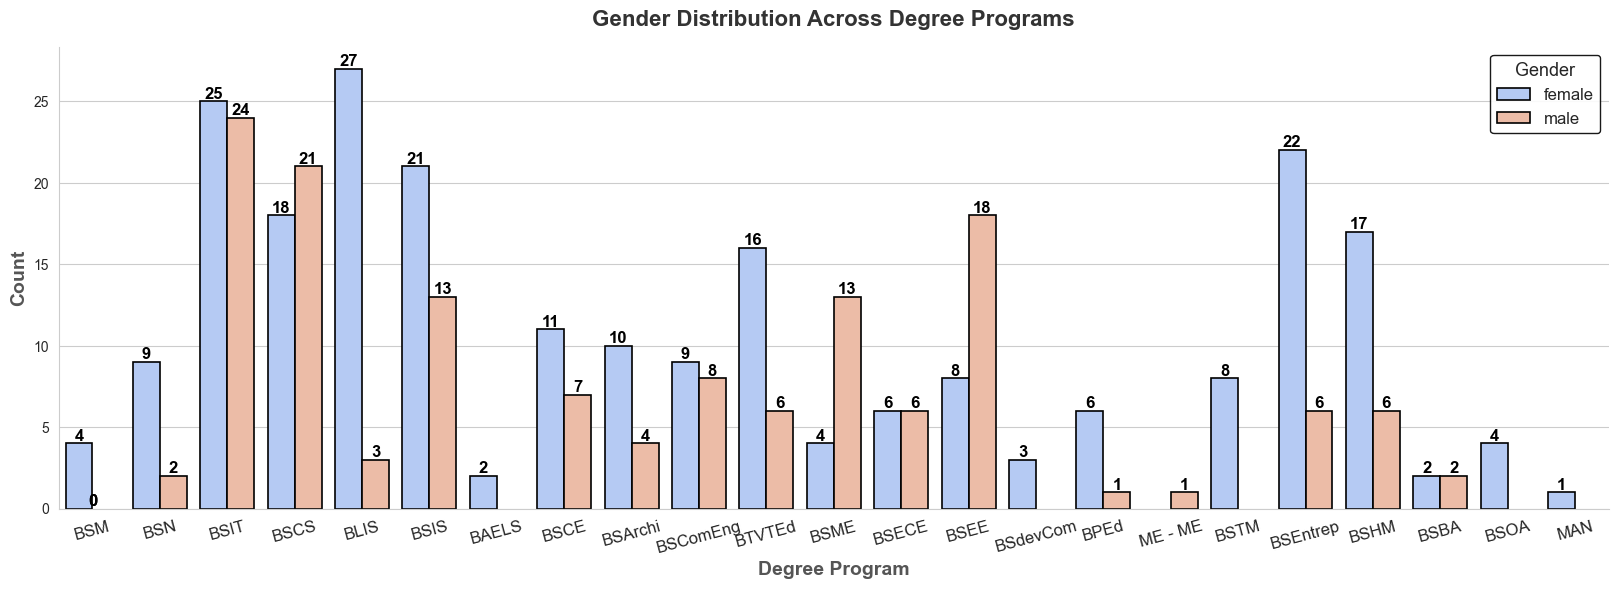

In [117]:
# Set figure size
my_pl.figure(figsize=(20, 6))

# Create a count plot for gender distribution across degree programs
ax = my_sb.countplot(data=my_love, x="Degree_Program", hue="Gender", 
                      palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution Across Degree Programs", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Degree Program", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


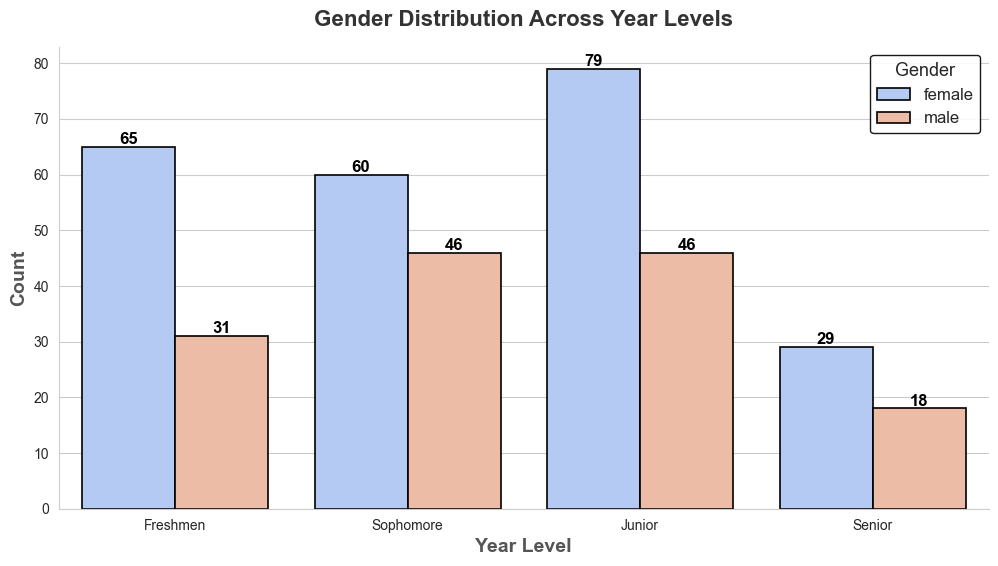

In [118]:
# Ensure "Year_Level" is treated as a categorical variable with a fixed order
year_order = ["Freshmen", "Sophomore", "Junior", "Senior"]
my_love["Year_Level"] = my_p.Categorical(my_love["Year_Level"], categories=year_order, ordered=True)

# Set figure size
my_pl.figure(figsize=(12, 6))

# Create count plot
ax = my_sb.countplot(data=my_love, x="Year_Level", hue="Gender", 
                      palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution Across Year Levels", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Year Level", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


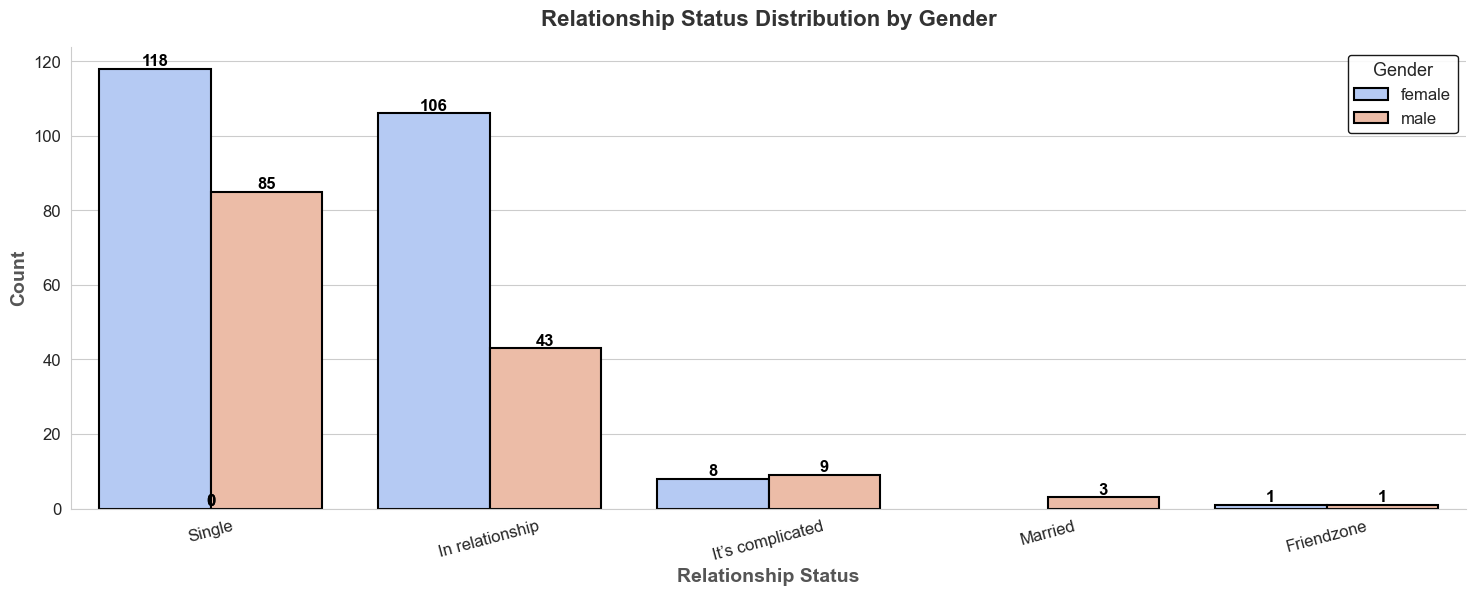

In [119]:
# Standardizing Relationship Status labels
my_love["Rel_Status"] = my_love["Rel_Status"].replace({
    "In a relationship": "In relationship",
    "It's complicated": "It’s complicated"
})

# Set Seaborn style for a modern look
my_sb.set_style("whitegrid")

# Set up the figure
my_pl.figure(figsize=(18, 6))

# Create the countplot
ax = my_sb.countplot(x="Rel_Status", hue="Gender", data=my_love, 
                      palette="coolwarm", edgecolor="black", linewidth=1.5)

# Annotate bars with the exact count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Extract the count value
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Add titles and labels with better fonts
my_pl.title("Relationship Status Distribution by Gender", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Relationship Status", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Improve legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)  # Slight transparency

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Remove top and right borders for a clean look
my_sb.despine()

# Show the plot
my_pl.show()


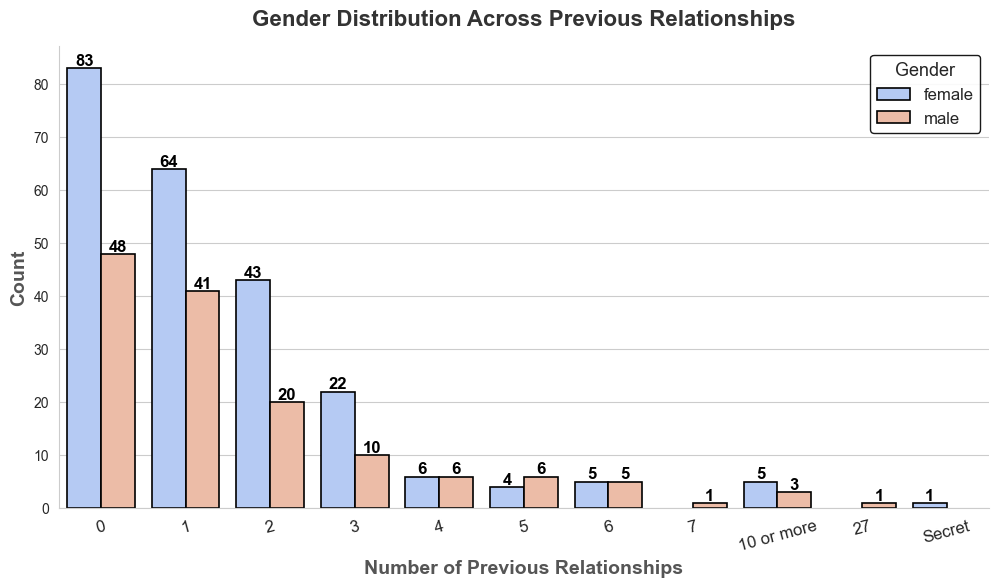

In [123]:
# Standardizing "Prev_Rel" labels
my_love["Prev_Rel"] = my_love["Prev_Rel"].replace({
    "10 and more": "10 or more",  # Unifying label
})

# Define the correct ascending order
prev_rel_order = sorted(my_love["Prev_Rel"].unique(), key=lambda x: int(x.split()[0]) if x[0].isdigit() else 999)

# Set figure size
my_pl.figure(figsize=(12, 6))

# Create a count plot for gender distribution across Previous Relationships
ax = my_sb.countplot(data=my_love, x="Prev_Rel", hue="Gender", 
                      order=prev_rel_order, palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution Across Previous Relationships", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Number of Previous Relationships", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(fontsize=12, rotation=15)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


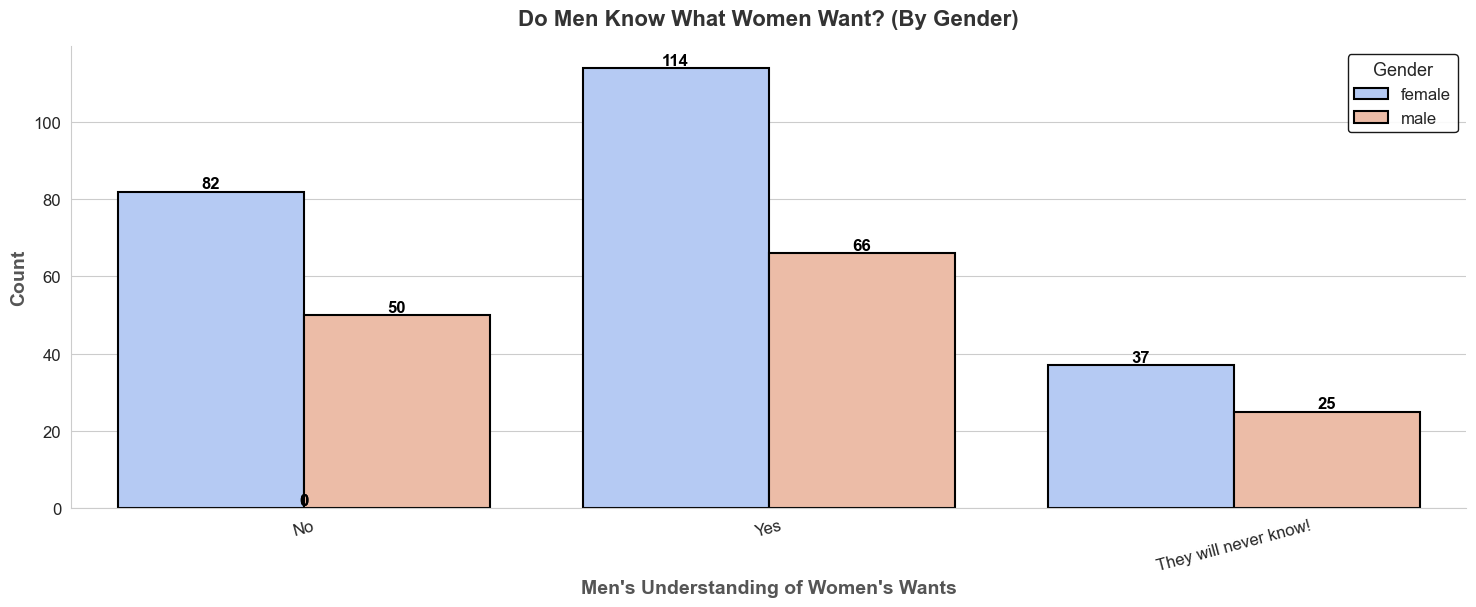

In [124]:
# Standardizing "Men_knows" labels
my_love["Men_knows "] = my_love["Men_knows "].replace({
    "Will never know": "They will never know!"
})

# Set Seaborn style for a polished look
my_sb.set_style("whitegrid")

# Set up the figure
my_pl.figure(figsize=(18, 6))

# Countplot with improved styling
ax = my_sb.countplot(x="Men_knows ", hue="Gender", data=my_love, 
                      palette="coolwarm", edgecolor="black", linewidth=1.5)

# Annotate bars with the exact count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Do Men Know What Women Want? (By Gender)", 
            fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Men's Understanding of Women's Wants", 
             fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, 
                      frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)  # Slight transparency

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Remove top and right borders for a clean design
my_sb.despine()

# Show the plot
my_pl.show()


C:\Users\Joshua Ean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


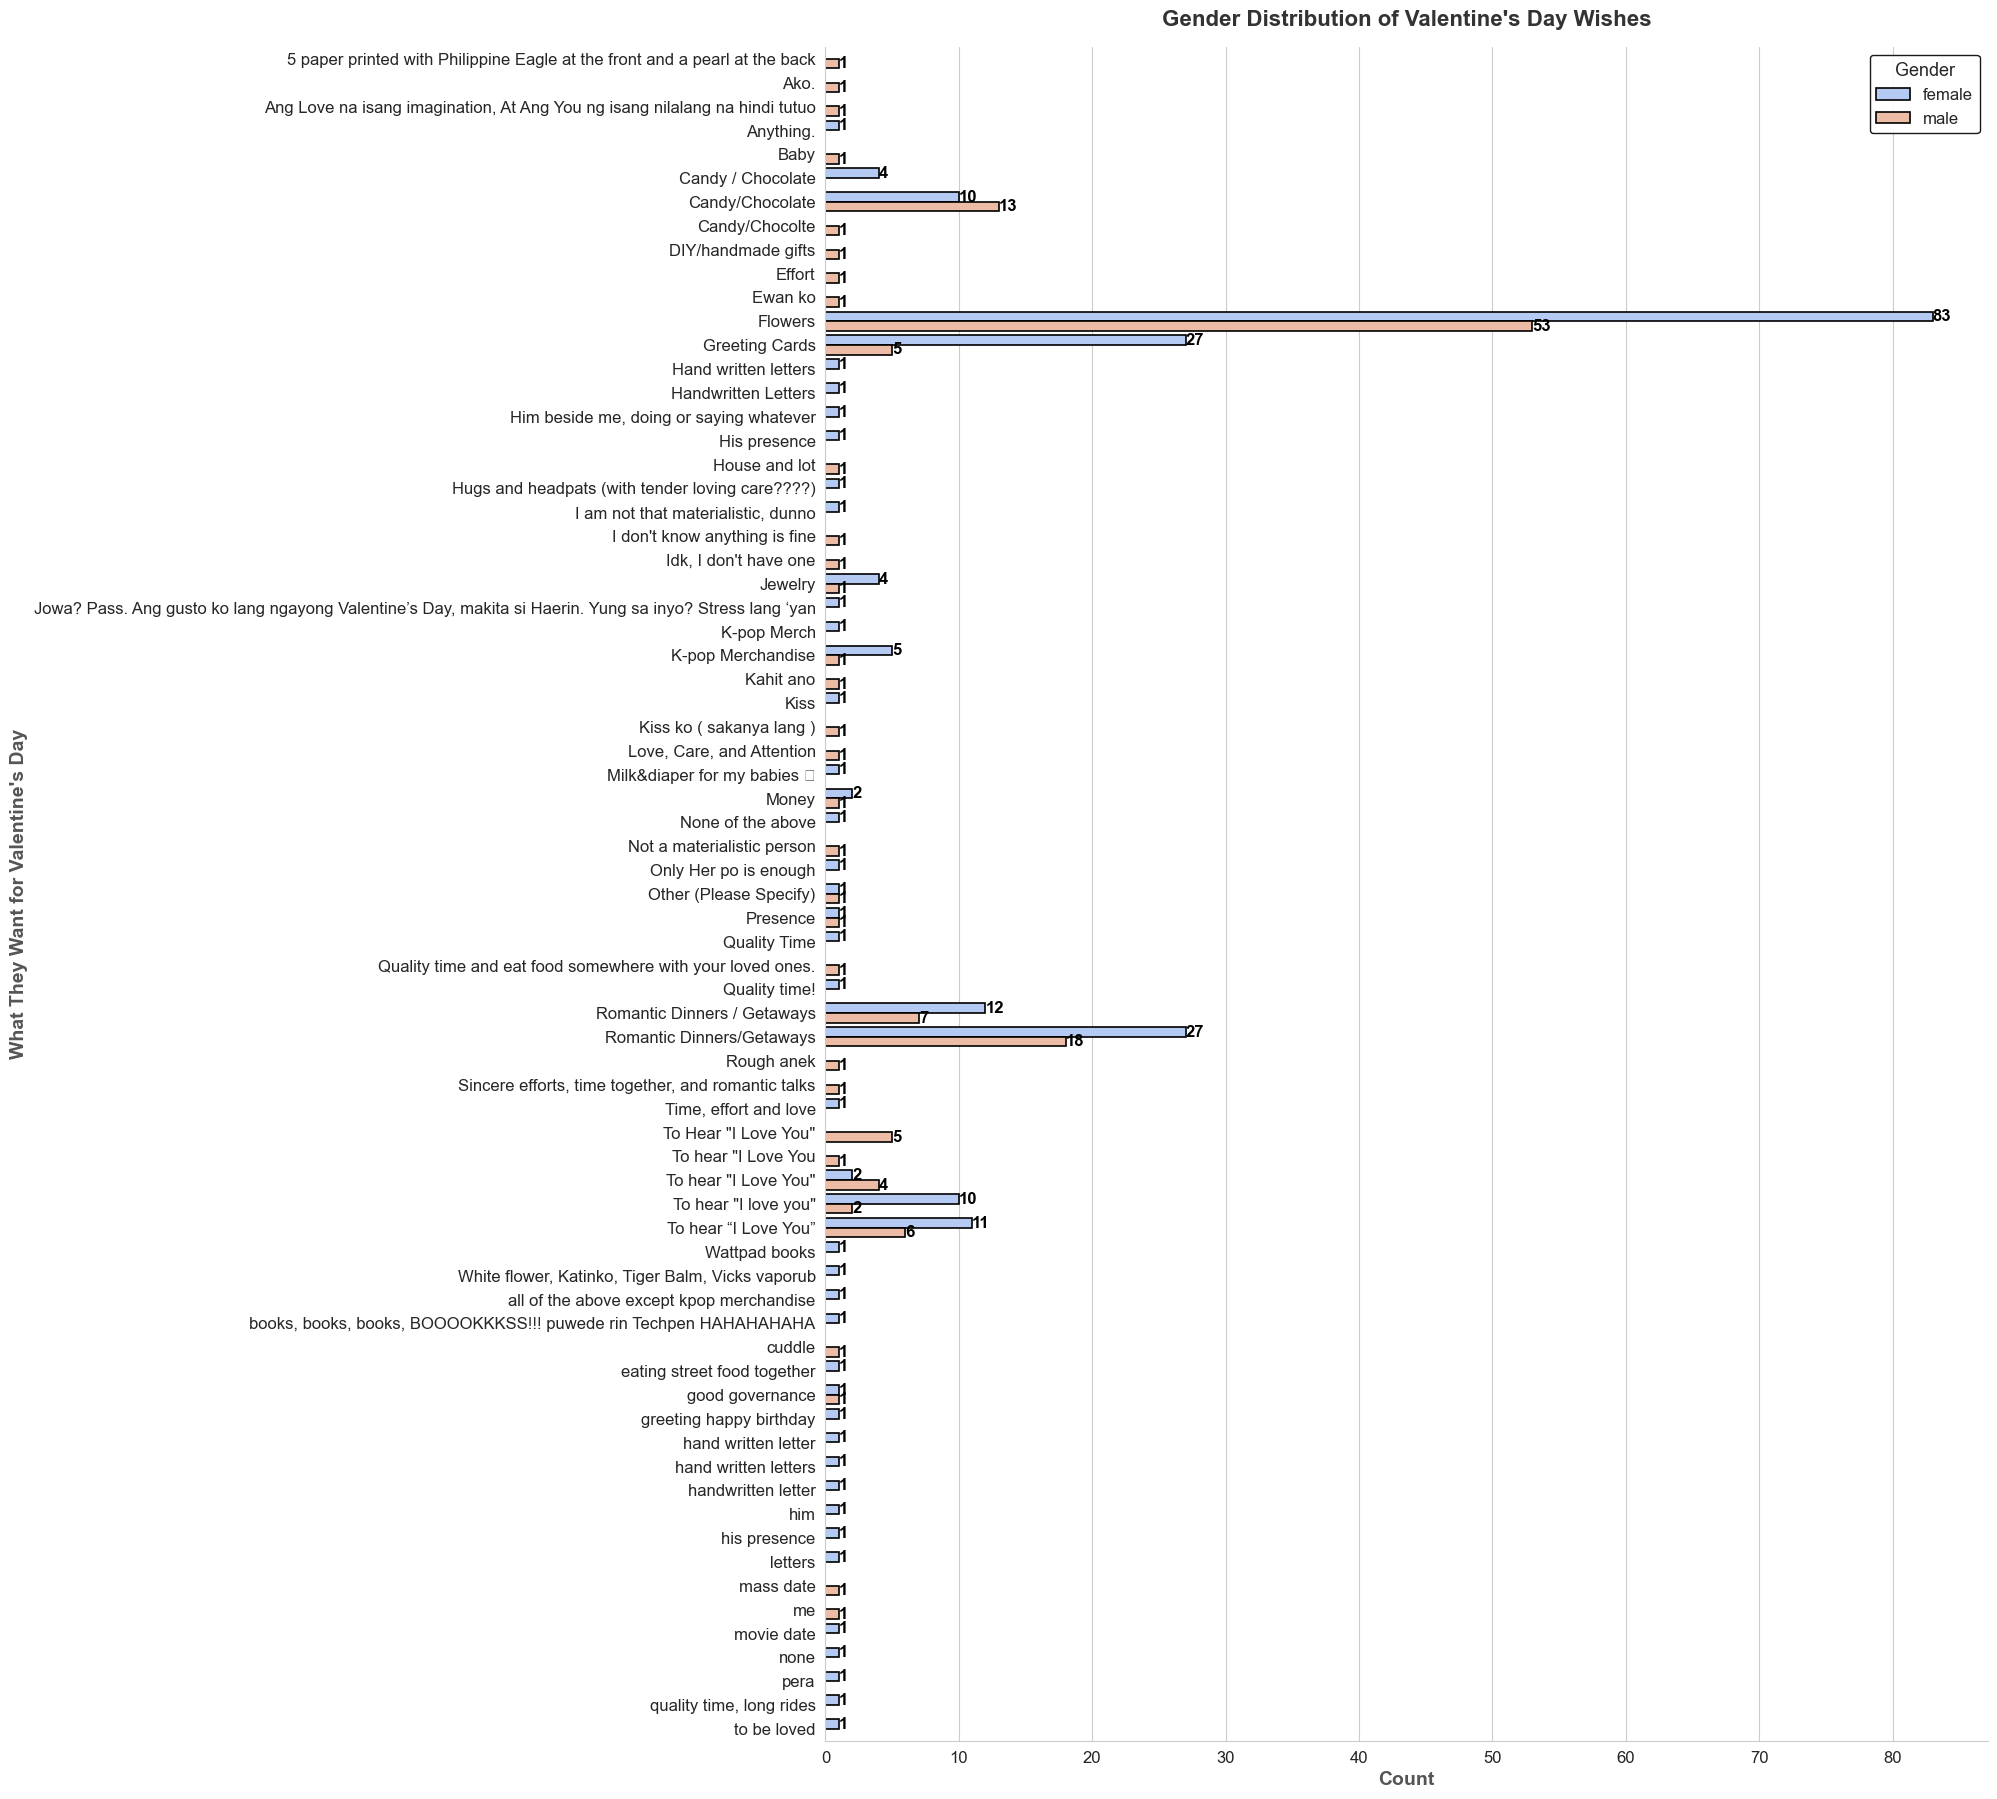

In [130]:
# Standardizing "Want_for_Vday" labels (if needed)
my_love["Want_for_Vday"] = my_love["Want_for_Vday"].str.strip()  # Remove extra spaces if present

# Get the sorted order of unique categories
vday_order = sorted(my_love["Want_for_Vday"].dropna().unique())  # Sort alphabetically for better readability

# Set figure size
my_pl.figure(figsize=(15, 22))

# Create a count plot for gender distribution across Valentine's Day preferences (horizontal)
ax = my_sb.countplot(data=my_love, y="Want_for_Vday", hue="Gender", 
                      order=vday_order, palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_width() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution of Valentine's Day Wishes", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.ylabel("What They Want for Valentine's Day", fontsize=14, fontweight="bold", color="#555")
my_pl.xlabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate y-axis labels for better readability
my_pl.yticks(fontsize=12)
my_pl.xticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


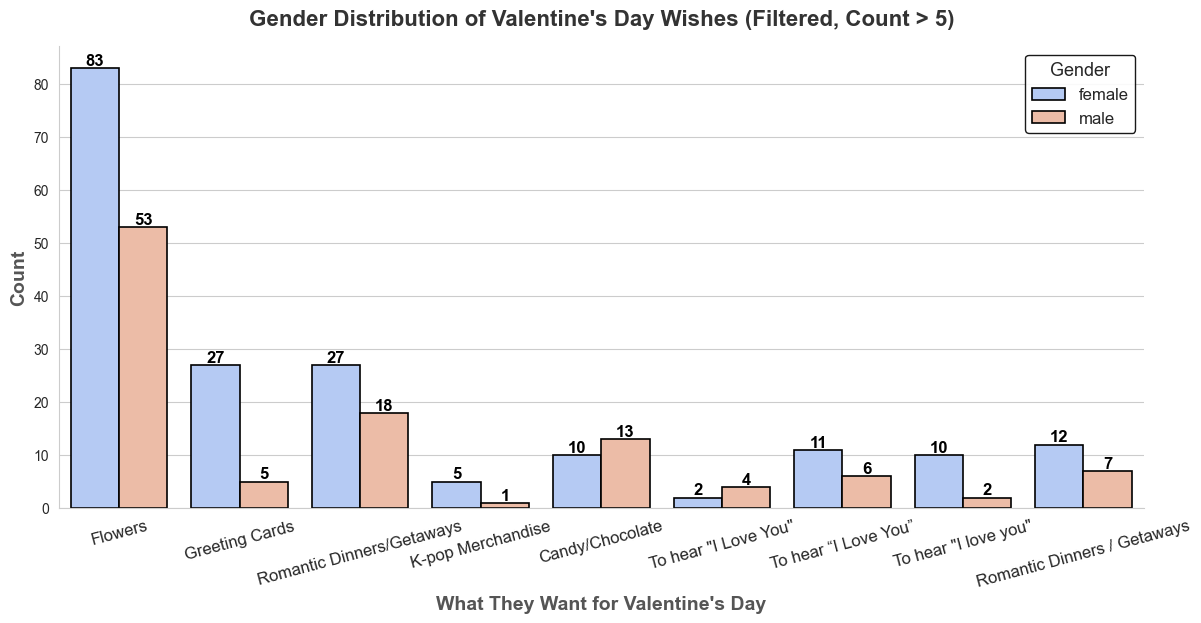

In [126]:
# Standardizing "Want_for_Vday" labels (if needed)
my_love["Want_for_Vday"] = my_love["Want_for_Vday"].str.strip()  # Remove extra spaces

# Count occurrences of each category
vday_counts = my_love["Want_for_Vday"].value_counts()

# Filter categories where count > 5
filtered_vday = vday_counts[vday_counts > 5].index.tolist()

# Set figure size
my_pl.figure(figsize=(14, 6))

# Create a count plot for gender distribution, only showing filtered categories
ax = my_sb.countplot(data=my_love[my_love["Want_for_Vday"].isin(filtered_vday)], 
                      x="Want_for_Vday", hue="Gender", 
                      palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution of Valentine's Day Wishes (Filtered, Count > 5)", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("What They Want for Valentine's Day", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(fontsize=12, rotation=15)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


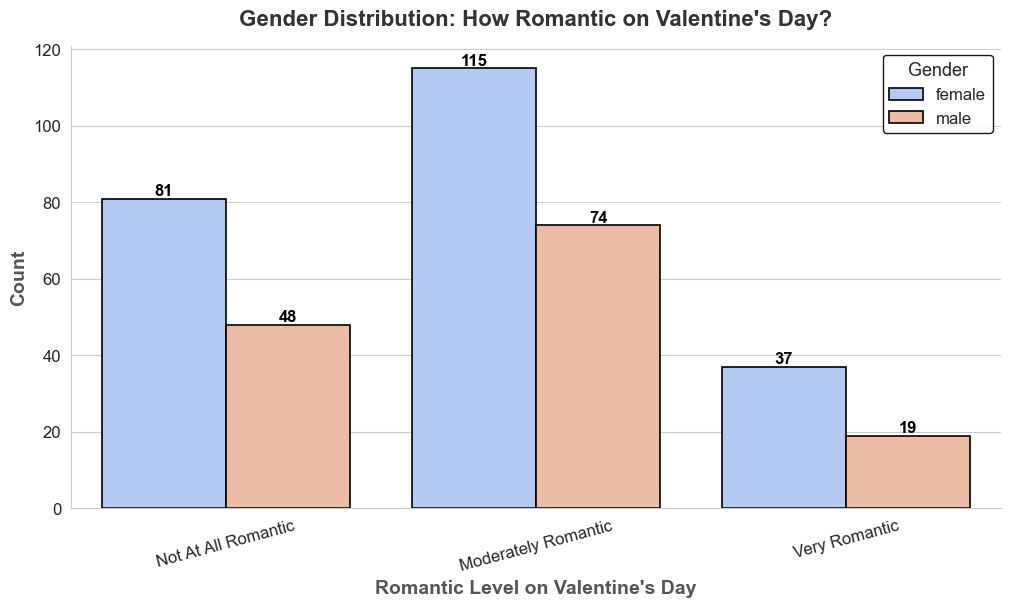

In [136]:
# Standardizing "How_Rom_VDay" labels
my_love["How_Rom_VDay"] = my_love["How_Rom_VDay"].replace({
    "Not at all romantic": "Not At All Romantic",
    "Moderately romantic": "Moderately Romantic",
    "Very romantic": "Very Romantic"
}).str.strip()  # Remove extra spaces if present

# Define the correct order (Not at all → Moderately → Very)
romance_order = ["Not At All Romantic", "Moderately Romantic", "Very Romantic"]

# Set figure size
my_pl.figure(figsize=(12, 6))

# Create a count plot for gender distribution across Valentine's Day romance preferences
ax = my_sb.countplot(data=my_love, x="How_Rom_VDay", hue="Gender", 
                      order=romance_order, palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution: How Romantic on Valentine's Day?", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Romantic Level on Valentine's Day", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


C:\Users\Joshua Ean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9996 (\N{VICTORY HAND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Joshua Ean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Joshua Ean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


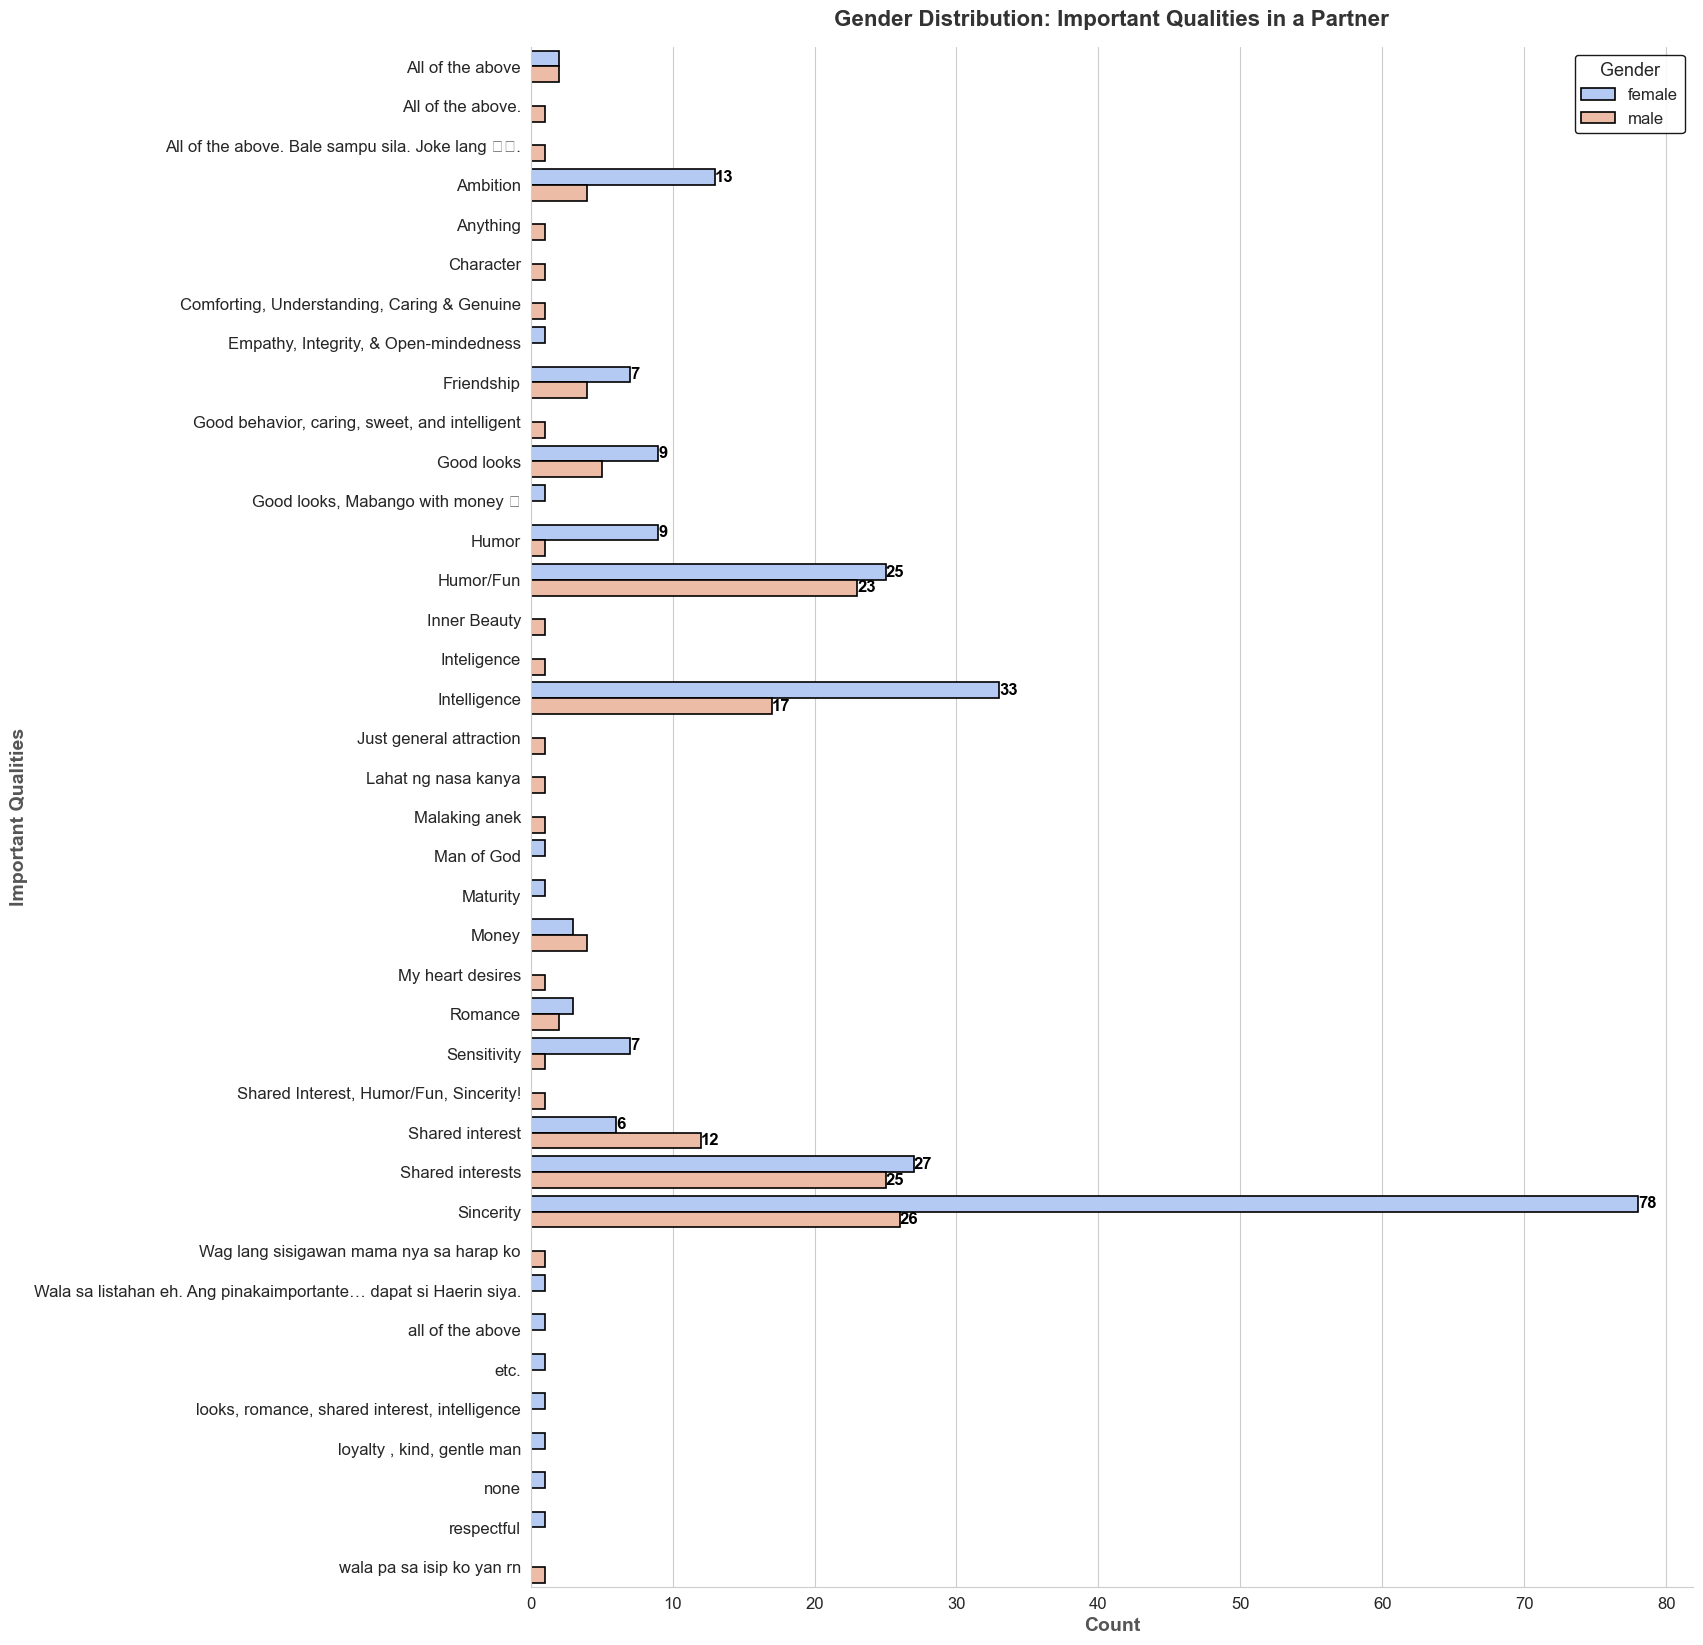

In [139]:
# Standardizing "Imp_Quality" labels (if needed)
my_love["Imp_Quality"] = my_love["Imp_Quality"].str.strip()  # Remove extra spaces if present

# Get the sorted order of unique qualities
quality_order = sorted(my_love["Imp_Quality"].dropna().unique())  # Sort alphabetically for better readability

# Set figure size
my_pl.figure(figsize=(15, 20))  # Adjust for better visibility

# Create a horizontal count plot
ax = my_sb.countplot(data=my_love, y="Imp_Quality", hue="Gender", 
                      order=quality_order, palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_width() > 5:  # Only label bars with count > 5
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution: Important Qualities in a Partner", fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.ylabel("Important Qualities", fontsize=14, fontweight="bold", color="#555")
my_pl.xlabel("Count", fontsize=14, fontweight="bold", color="#555")

# Improve y-axis label readability
my_pl.yticks(fontsize=12)
my_pl.xticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


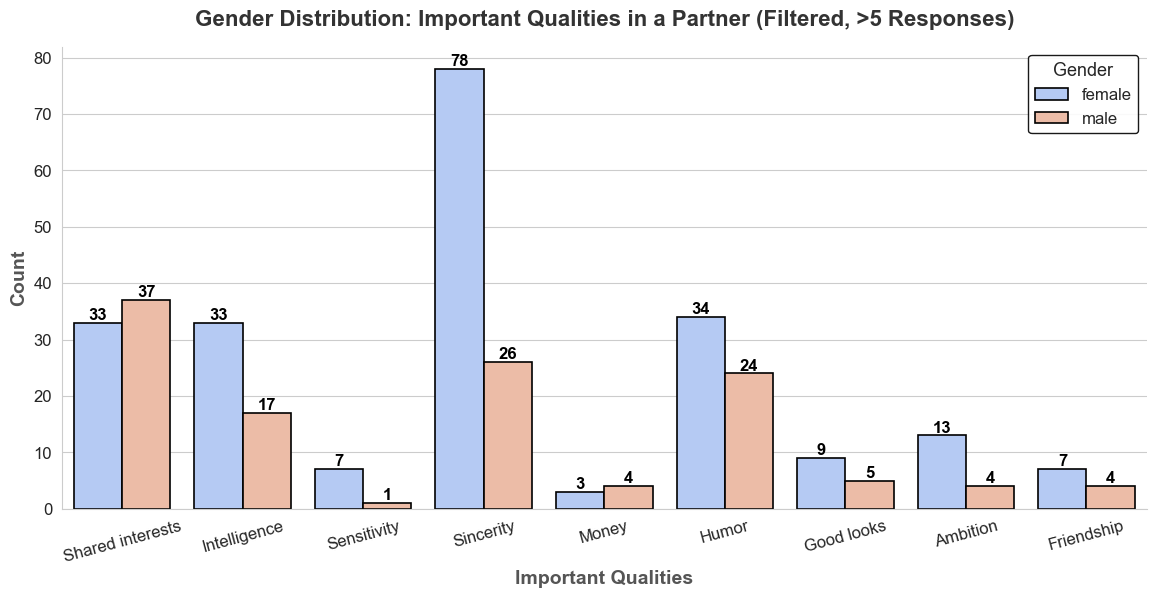

In [141]:
# Standardizing "Imp_Quality" labels (if needed)
my_love["Imp_Quality"] = my_love["Imp_Quality"].str.strip()  # Remove extra spaces if present

# Rename specific labels for consistency
my_love["Imp_Quality"] = my_love["Imp_Quality"].replace({
    "Shared interest": "Shared interests",
    "Humor/Fun": "Humor"
})

# Count occurrences of each "Imp_Quality" by Gender
quality_counts = my_love.groupby("Imp_Quality")["Gender"].value_counts().unstack()

# Filter qualities where total responses exceed 5
filtered_qualities = quality_counts[quality_counts.sum(axis=1) > 5].index.tolist()

# Set figure size
my_pl.figure(figsize=(14, 6))  # Adjusted for better visibility

# Create a count plot with filtered qualities
ax = my_sb.countplot(data=my_love[my_love["Imp_Quality"].isin(filtered_qualities)], 
                      x="Imp_Quality", hue="Gender", 
                      palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution: Important Qualities in a Partner (Filtered, >5 Responses)", 
            fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Important Qualities", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()


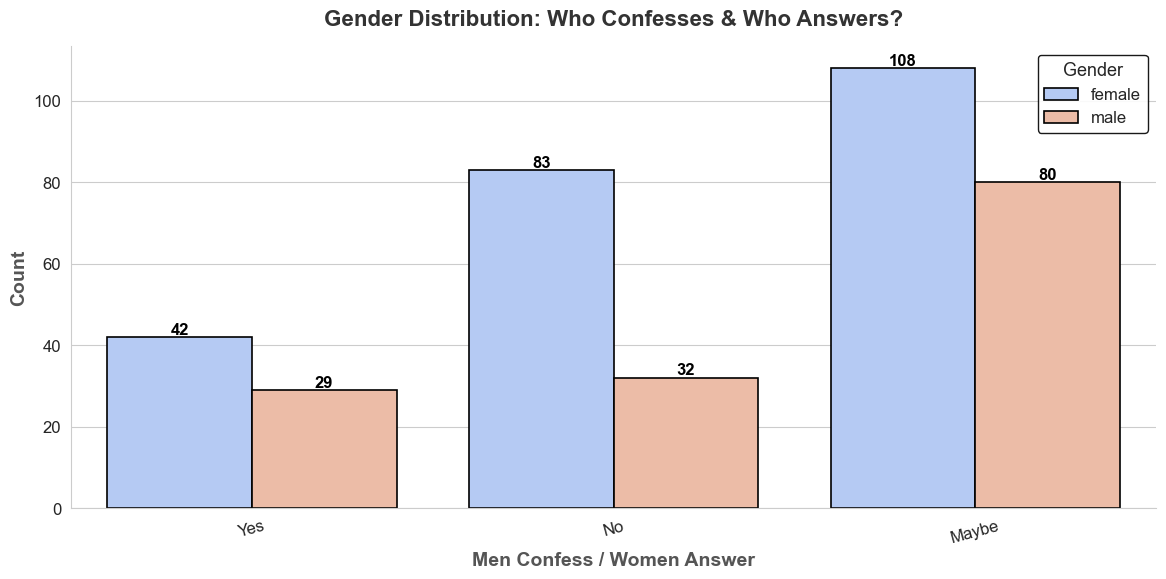

In [144]:
# Standardizing "Men_confess / Women_answer" labels (if needed)
my_love["Men_confess / Women_answer"] = my_love["Men_confess_/_Women_answer "].str.strip()  # Remove extra spaces if present

# Set figure size
my_pl.figure(figsize=(14, 6))  # Adjusted for better readability

# Create a count plot (no filtering)
ax = my_sb.countplot(data=my_love, x="Men_confess / Women_answer", hue="Gender", 
                      palette="coolwarm", edgecolor="black", linewidth=1.2)

# Add annotations for exact count values
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with actual data
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# Improve titles and labels
my_pl.title("Gender Distribution: Who Confesses & Who Answers?", 
            fontsize=16, fontweight="bold", pad=15, color="#333")
my_pl.xlabel("Men Confess / Women Answer", fontsize=14, fontweight="bold", color="#555")
my_pl.ylabel("Count", fontsize=14, fontweight="bold", color="#555")

# Rotate x-axis labels for better readability
my_pl.xticks(rotation=15, fontsize=12)
my_pl.yticks(fontsize=12)

# Enhance legend appearance
legend = my_pl.legend(title="Gender", fontsize=12, title_fontsize=13, frameon=True, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(0.9)

# Remove top and right borders for a cleaner look
my_sb.despine()

# Display the plot
my_pl.show()
